In [48]:
# 다중선형회귀분석

In [49]:
import pandas as pd
import seaborn as sns

In [50]:
car1 = pd.read_csv('./car_year2.csv',encoding='utf-8')
car1


,mileage,mpg,engineSize,price,brand_bmw,brand_cclass,brand_focus,brand_ford,brand_hyundi,brand_merc,...,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,15735,55.4,1.4,12500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,29946,55.4,1.4,11000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1998,49.6,1.0,17300,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,32260,58.9,1.4,13900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,76788,61.4,2.0,13250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57502,65000,48.0,2.0,4995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57503,41850,58.9,2.0,12495,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57504,58000,58.9,2.0,8950,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57505,92640,48.0,2.0,2995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np

import os

In [52]:
from sklearn.model_selection import train_test_split
X = car1.drop("price",axis = 1)
y = car1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((40254, 41), (17253, 41), (40254,), (17253,))

## 다중선형회귀 

In [53]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression()

In [55]:
# 다중선형회귀 정확도

print("훈련 세트의 정확도 : {:.4f}".format(mlr.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.4f}".format(mlr.score(X_test,y_test)))


훈련 세트의 정확도 : 0.8276
테스트 세트의 정확도 : 0.8245


In [56]:
# 만들어진 모델을 X_test에 넣어서 pred_y(예측 y 값 도출)
y_pred = mlr.predict(X_test) 

In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 우리가 만든 모델의 에러를 점검해본다. 
mae_pred = mean_absolute_error( y_test, y_pred)   # mae
print('다중선형회귀모델의 오차: {:.4f}'.format(mae_pred))

다중선형회귀모델의 오차: 2231.6494


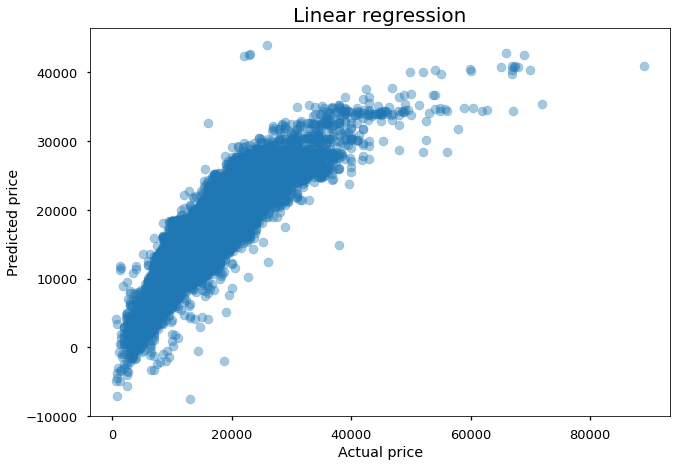

In [58]:
# 실제가 vs 예측가
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Linear regression", size = 20)
plt.show()

## 가격예측

In [59]:
pred=pd.read_csv("./예측데이터.csv")

In [60]:
pred

,mileage,mpg,engineSize,brand_bmw,brand_cclass,brand_focus,brand_ford,brand_hyundi,brand_merc,brand_skoda,...,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,46112,60.1,1.4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
y_pred = model.predict(pred) # 예측 값

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 41 is different from 172)

In [14]:
y_pred

array([11718.98195351])

In [16]:
pred2=pd.read_csv("./예측데이터2.csv")

In [17]:
y_pred = model.predict(pred2) # 예측 값

In [18]:
y_pred

array([26722.76102789])